# DETECTING ANOMALIES IN FINANCIAL TRANSACTIONS

**Libraries Utilized:**

- Pandas (utilized for dataset importing and analysis)
- Matplotlib (employed for visualizing insights and result analysis through graphical representation)
- IBM Learn (utilized for Sample Minority Oversampling to address imbalanced data distribution)
- Sklearn (utilized for constructing machine learning models and conducting evaluations)
- XGBoost (utilized for implementing boosted trees using XGBoost algorithm)
- Pickle (utilized for storing the trained models)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pickle
import numpy as np
import seaborn as sns
from collections import Counter

**Exploratory Data Analysis:**

In [20]:
df = pd.read_csv("fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [21]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [22]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [23]:
df.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [24]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [25]:
df.drop(['Unnamed: 0', 'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time', 'gender', 'merchant', 'merch_lat', 'merch_long'],axis=1, inplace=True)

In [26]:
df.head()

,category,amt,lat,long,city_pop,job,unix_time,is_fraud
0,personal_care,2.86,33.9659,-80.9355,333497,Mechanical engineer,1371816865,0
1,personal_care,29.84,40.3207,-110.4360,302,"Sales professional, IT",1371816873,0
2,health_fitness,41.28,40.6729,-73.5365,34496,"Librarian, public",1371816893,0
3,misc_pos,60.05,28.5697,-80.8191,54767,Set designer,1371816915,0
4,travel,3.19,44.2529,-85.0170,1126,Furniture designer,1371816917,0


In [27]:
le = LabelEncoder()
df["category"] = le.fit_transform(df["category"])
df["job"] = le.fit_transform(df["job"])

In [28]:
df.head()

,category,amt,lat,long,city_pop,job,unix_time,is_fraud
0,10,2.86,33.9659,-80.9355,333497,275,1371816865,0
1,10,29.84,40.3207,-110.4360,302,392,1371816873,0
2,5,41.28,40.6729,-73.5365,34496,259,1371816893,0
3,9,60.05,28.5697,-80.8191,54767,407,1371816915,0
4,13,3.19,44.2529,-85.0170,1126,196,1371816917,0


**Sampling Minority using SMOTE:**

In [29]:
X = df.drop(columns=['is_fraud']) 
y = df['is_fraud'] 

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

<Axes: >

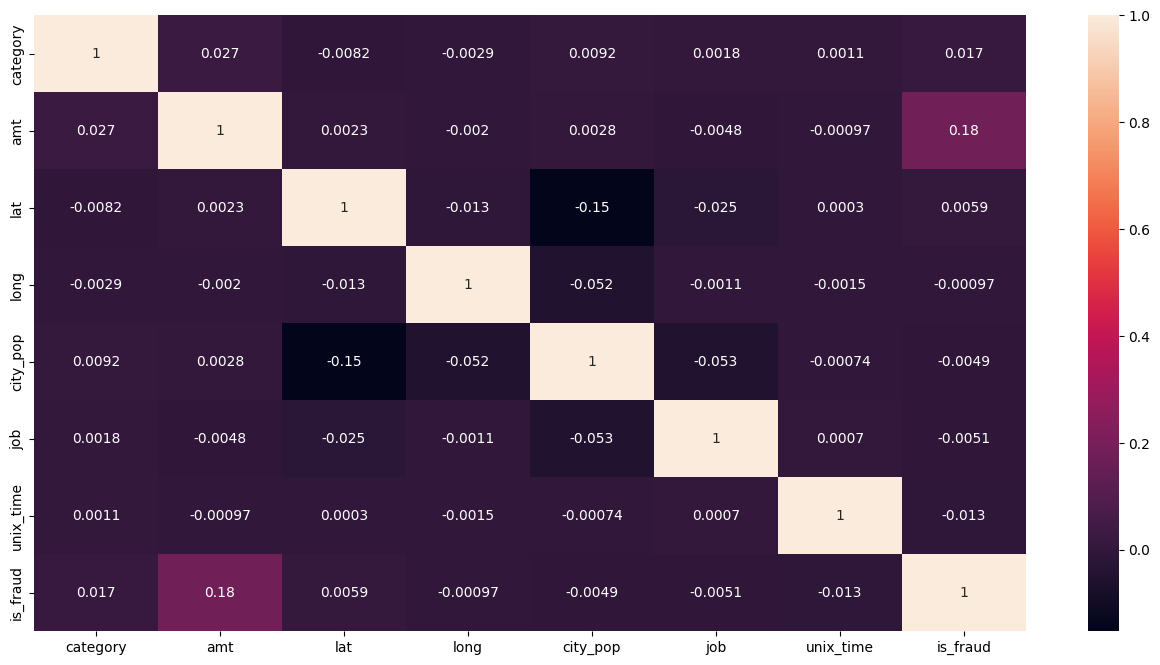

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [31]:
#sns.pairplot(df)

Splitting to train-test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True, random_state=42)

In [33]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = xgb.XGBClassifier()

In [34]:
def model_train(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    with open(str(model)[:3] + '_mdl.pkl', 'wb') as f:
        pickle.dump(model,f)

Logistic Regression Model

In [35]:
model_train(model1, X_train, y_train, X_test, y_test)

Accuracy Score:  0.8793614234746873
              precision    recall  f1-score   support

           0       0.83      0.95      0.89    110422
           1       0.95      0.81      0.87    111008

    accuracy                           0.88    221430
   macro avg       0.89      0.88      0.88    221430
weighted avg       0.89      0.88      0.88    221430



Decision Tree Model

In [36]:
model_train(model2, X_train, y_train, X_test, y_test)

Accuracy Score:  0.9909000587092986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    110422
           1       0.99      0.99      0.99    111008

    accuracy                           0.99    221430
   macro avg       0.99      0.99      0.99    221430
weighted avg       0.99      0.99      0.99    221430



XG Boost Model

In [37]:
model_train(model3, X_train, y_train, X_test, y_test)

Accuracy Score:  0.9908639299101296
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    110422
           1       0.99      0.99      0.99    111008

    accuracy                           0.99    221430
   macro avg       0.99      0.99      0.99    221430
weighted avg       0.99      0.99      0.99    221430



Ensemble

In [38]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred = [list(y_pred1), list(y_pred2), list(y_pred3)]
n = len(y_pred[0])


In [39]:
pred_list = []
for i in range(n):
    prediction_list = [y_pred1[i], y_pred2[i], y_pred3[i]]
    counter = Counter(prediction_list)
    most_common_prediction = counter.most_common(1)
    pred_list.append(most_common_prediction[0][0])
    

In [40]:
y_pred = np.array(pred_list)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy Score:  0.9900058709298649
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    110422
           1       0.99      0.99      0.99    111008

    accuracy                           0.99    221430
   macro avg       0.99      0.99      0.99    221430
weighted avg       0.99      0.99      0.99    221430



**Saved models:**

Log_mdl.pkl - Logistic Regression
Dec_mdl.pkl - Decision Tree
XGB_mdl.pkl - XG Boosting Tree

Feature Importance

Text(0.5, 1.0, 'Feature Importance')

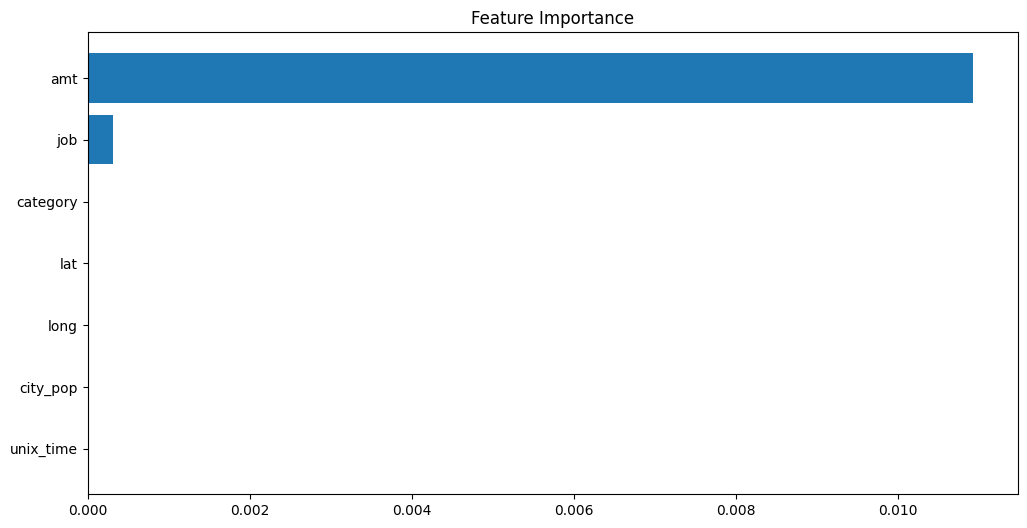

In [41]:
coefficients = model1.coef_[0]
feature_importance = np.abs(coefficients)
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

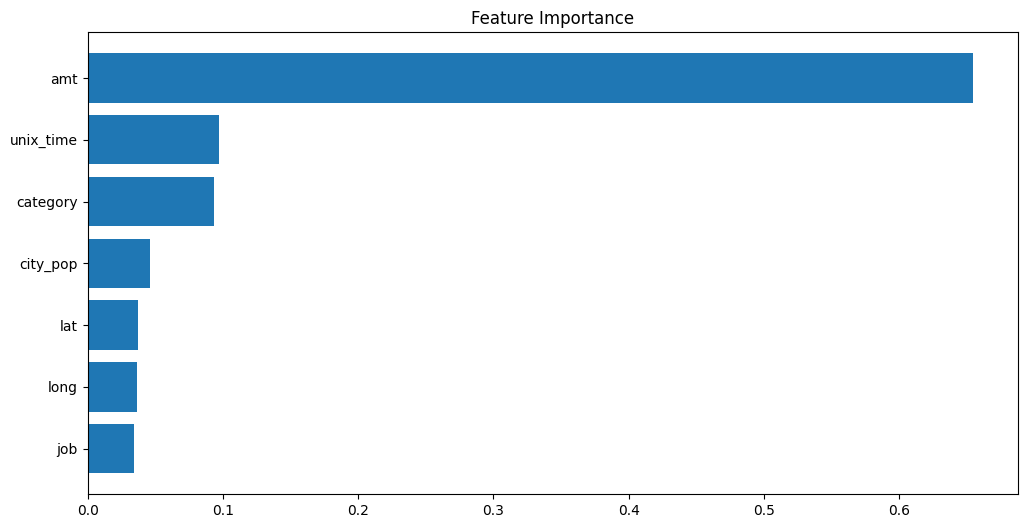

In [42]:
feature_importance = model2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

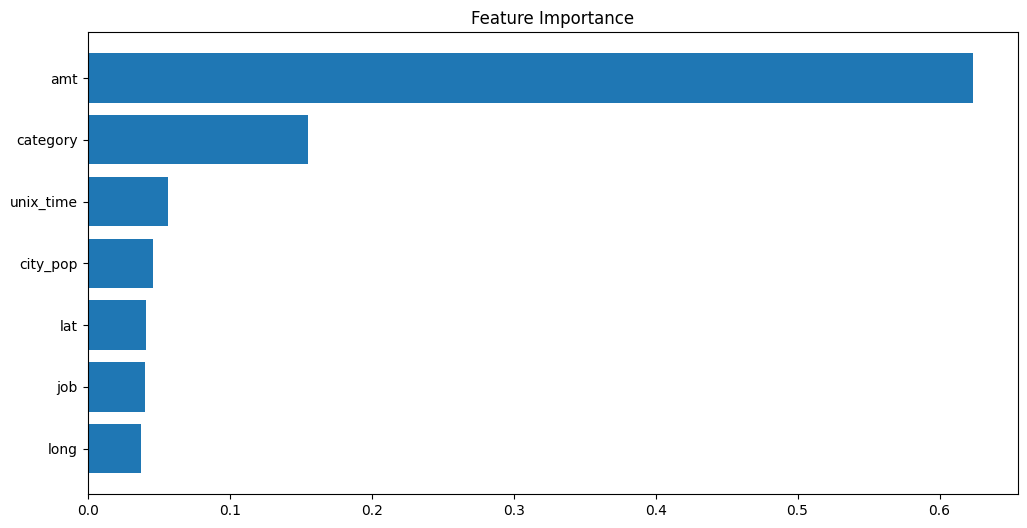

In [43]:
feature_importance = model3.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')